In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_heart =pd.read_csv('heart.csv')

In [5]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df_heart.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [7]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df_heart.duplicated().sum()

1

In [10]:
df_heart=df_heart.drop_duplicates(keep="first")

In [13]:
def outliers_z_score(df):
    threshold = 3
    mean_y = np.mean(df)
    stdev_y = np.std(df)
    for i in df:
        z_score=(i-mean_y)/stdev_y
        if np.abs(z_score)>threshold:
            outliers.append(i)
    
    return outliers

outliers=[]

#thalachh feature
a=outliers_z_score(df_heart.thalachh)
for i in a:     
    df_heart['thalachh'].iloc[df_heart[df_heart.thalachh==i].index]=np.nan
    
#chol feature
b=outliers_z_score(df_heart.chol)
for i in b:     
    df_heart['chol'].iloc[df_heart[df_heart.chol==i].index]=np.nan
    
#oldpeak feature
c=outliers_z_score(df_heart.oldpeak)
for i in c:
    df_heart['oldpeak'].iloc[df_heart[df_heart.oldpeak==i].index]=np.nan
    
#imputing nan values
df_heart['new_thalachh']=df_heart.thalachh.fillna(df_heart.thalachh.mean())
df_heart['new_chol']=df_heart.chol.fillna(df_heart.chol.mean())
df_heart['new_oldpeak']=df_heart.oldpeak.fillna(df_heart.oldpeak.mean())

In [14]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,new_thalachh,new_chol,new_oldpeak
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1,150.0,233.0,2.3
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1,187.0,250.0,3.5
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1,172.0,204.0,1.4
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1,178.0,236.0,0.8
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1,163.0,354.0,0.6


In [31]:
comparision_cols=np.where(df_heart['oldpeak']== df_heart['new_oldpeak'],True,False)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [32]:
count=np.count_nonzero(comparision_cols)
count

294

In [16]:
df_heart=df_heart[~df_heart['oldpeak'].isna()]

In [17]:
df_heart=df_heart[~df_heart['thalachh'].isna()]

In [18]:
df_heart=df_heart[~df_heart['chol'].isna()]

<AxesSubplot:xlabel='age'>

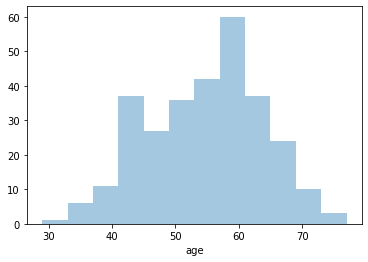

In [19]:
sns.distplot(df_heart['age'],kde = False)

<AxesSubplot:xlabel='age', ylabel='count'>

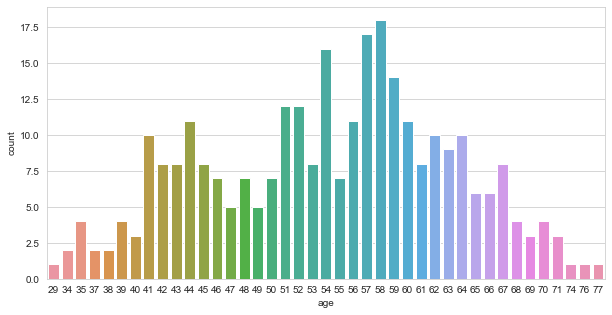

In [20]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='age',data=df_heart)

<AxesSubplot:xlabel='sex'>

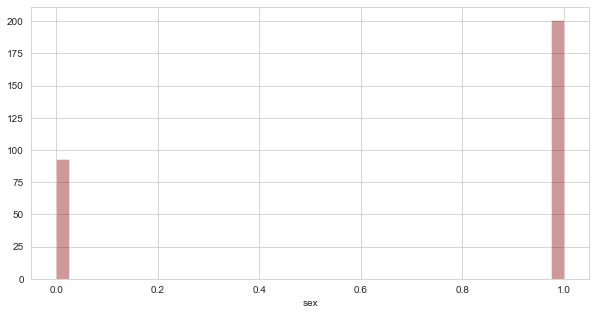

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df_heart['sex'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='sex', ylabel='count'>

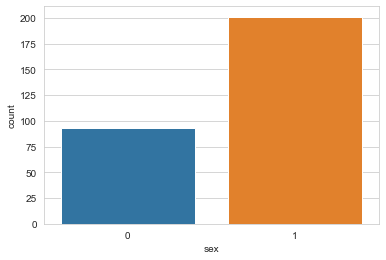

In [22]:
sns.countplot(x='sex',data=df_heart)

Text(0.5, 1.0, 'Chest pain type')

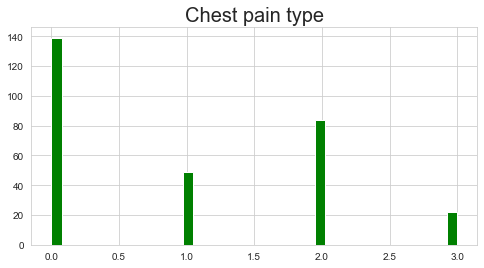

In [23]:
df_heart['cp'].hist(color='green',bins=40,figsize=(8,4))
plt.title("Chest pain type",fontsize=20)

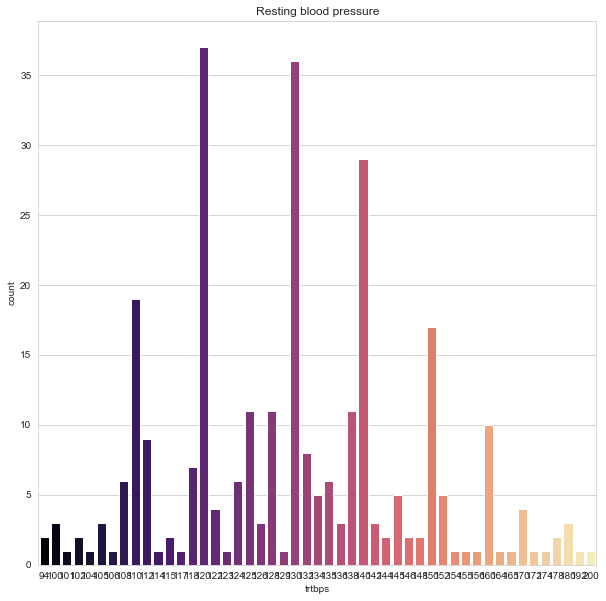

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'trtbps', data = df_heart, palette = 'magma')
plt.title('Resting blood pressure')
plt.show()

<AxesSubplot:title={'center':' Cholestoral '}, xlabel='chol', ylabel='count'>

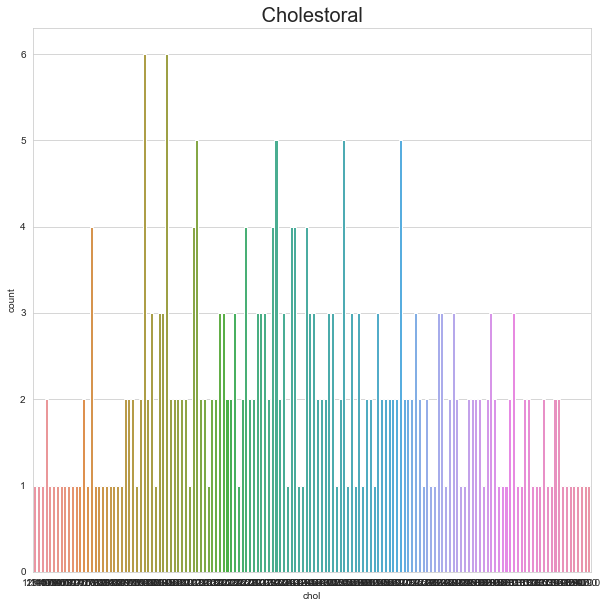

In [25]:
plt.figure(figsize=(10,10))
plt.title(" Cholestoral ",fontsize=20)
sns.countplot(x='chol',data=df_heart)

<AxesSubplot:title={'center':'Fasting blood sugar'}, xlabel='fbs', ylabel='Density'>

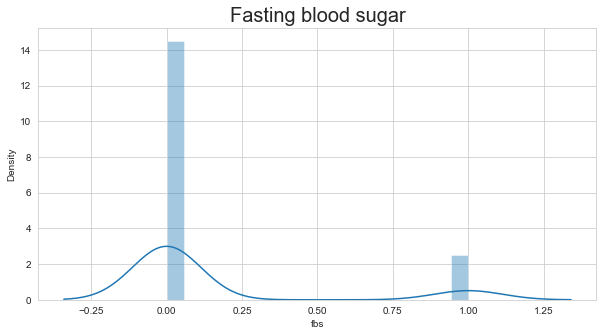

In [26]:
plt.figure(figsize=(10,5))
plt.title("Fasting blood sugar",fontsize=20)
sns.distplot(df_heart['fbs'])

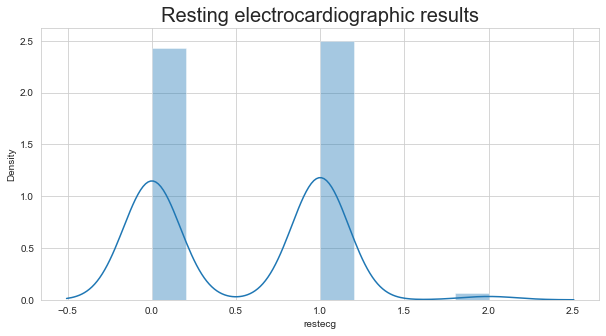

In [27]:
plt.figure(figsize=(10,5))
plt.title("Resting electrocardiographic results",fontsize=20)
sns.distplot(df_heart['restecg'].dropna(),bins=10)
plt.show()

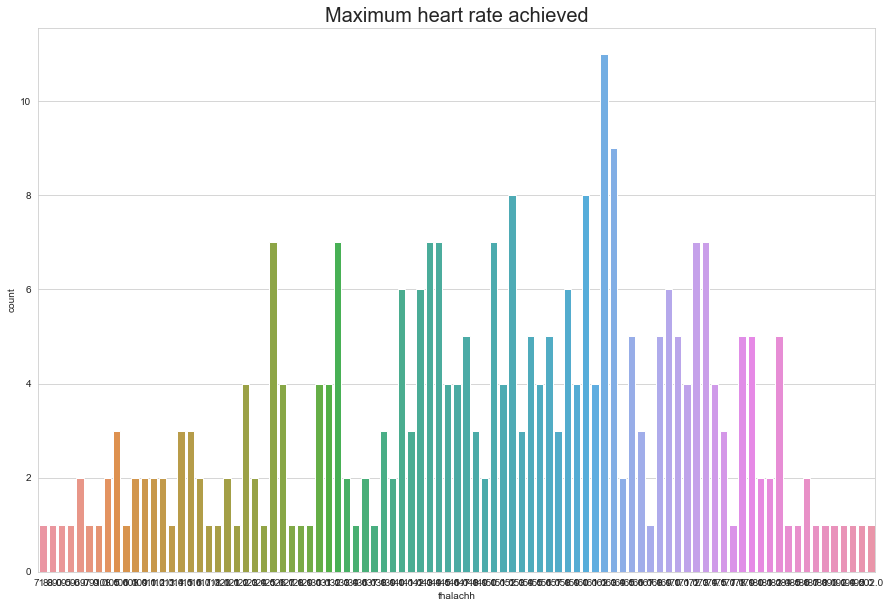

In [28]:
plt.figure(figsize=(15,10))
plt.title("Maximum heart rate achieved",fontsize=20)
sns.countplot(x='thalachh',data=df_heart)
plt.show()

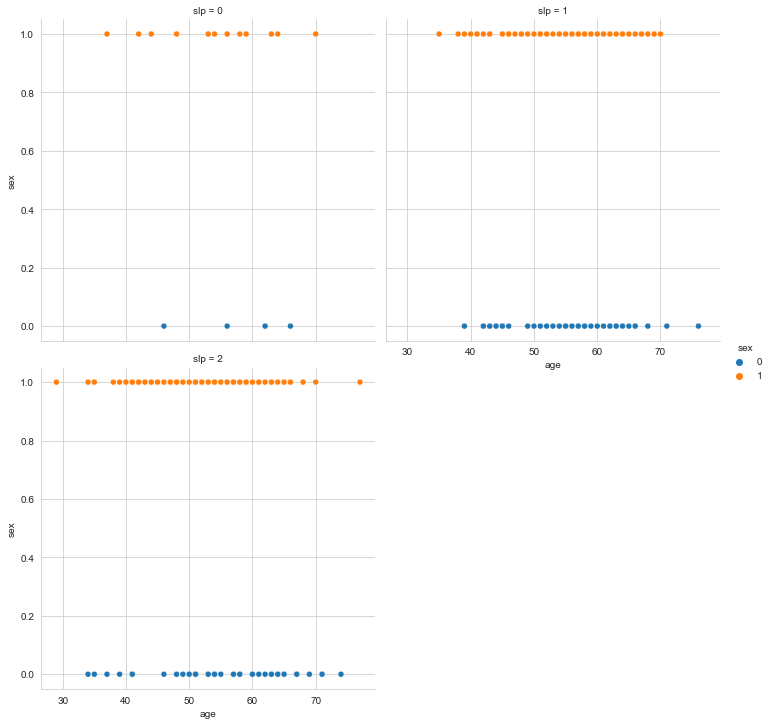

In [29]:
sns.relplot(data=df_heart, x="age", y="sex",hue='sex',col="slp", col_wrap=2)

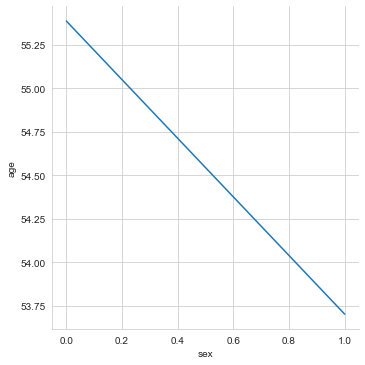

In [30]:
sns.relplot(data=df_heart, x="sex", y="age",kind="line",ci=None)

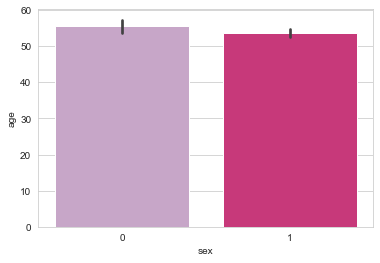

In [29]:
sns.barplot(x = 'sex', y = 'age', data =df_heart,
            palette = 'PuRd')
plt.show()

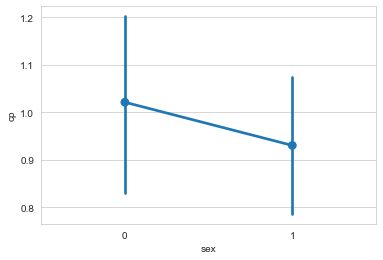

In [30]:
sns.pointplot(x="sex", y="cp", data=df_heart)
plt.show()

<AxesSubplot:xlabel='age', ylabel='cp'>

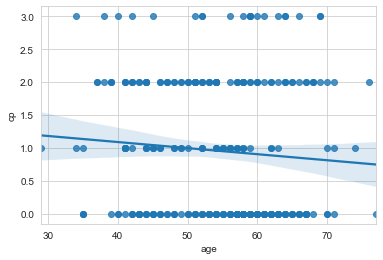

In [31]:
sns.regplot(x="age", y="cp", data=df_heart)

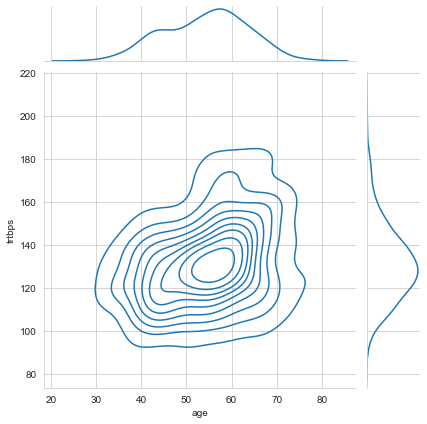

In [32]:
sns.jointplot(x='age', y='trtbps', data=df_heart, kind='kde')

<AxesSubplot:xlabel='age', ylabel='fbs'>

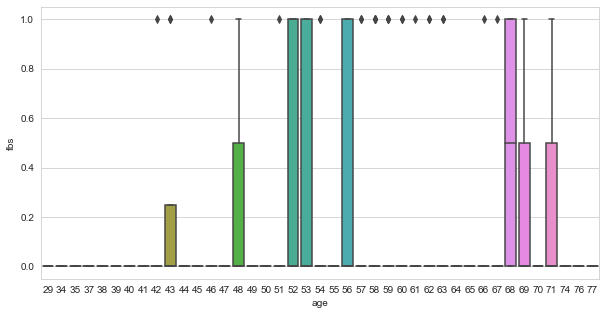

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x="age", y="fbs", data=df_heart)

<AxesSubplot:xlabel='age', ylabel='chol'>

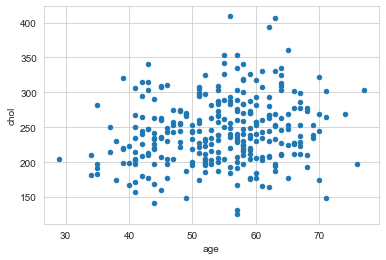

In [34]:
df_heart.plot.scatter(x= "age" ,y ="chol")

<AxesSubplot:xlabel='age', ylabel='trtbps'>

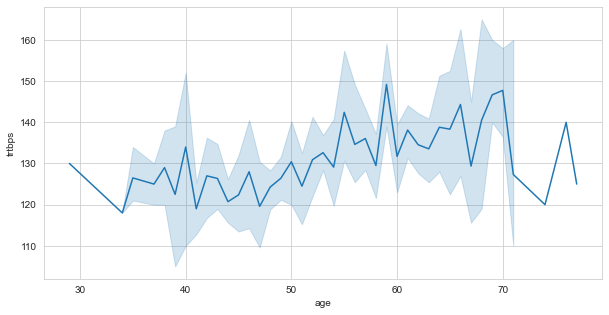

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(y="trtbps",x="age",data=df_heart)

<AxesSubplot:xlabel='restecg', ylabel='age'>

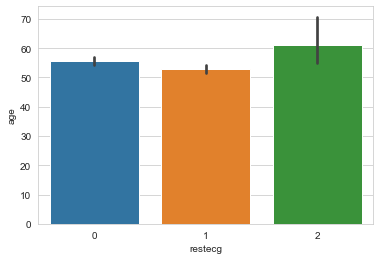

In [36]:
sns.barplot(x='restecg', y='age', data=df_heart)

<AxesSubplot:xlabel='thalachh', ylabel='age'>

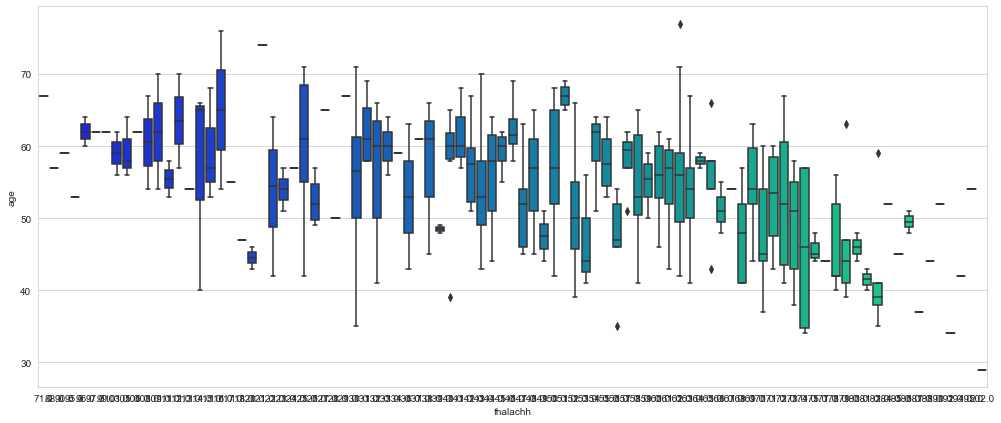

In [37]:
plt.figure(figsize=(17, 7))
sns.boxplot(x='thalachh',y='age',data=df_heart,palette='winter')

<AxesSubplot:xlabel='age', ylabel='cp'>

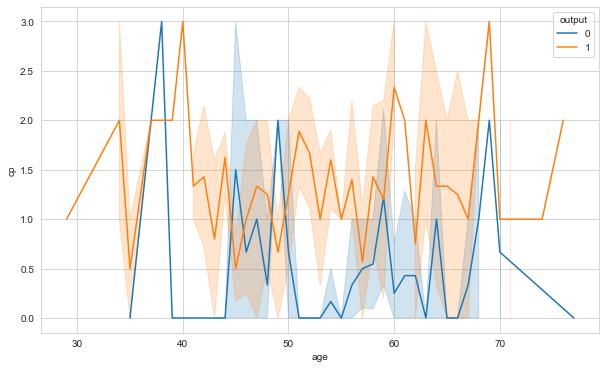

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="cp",hue="output",data=df_heart)

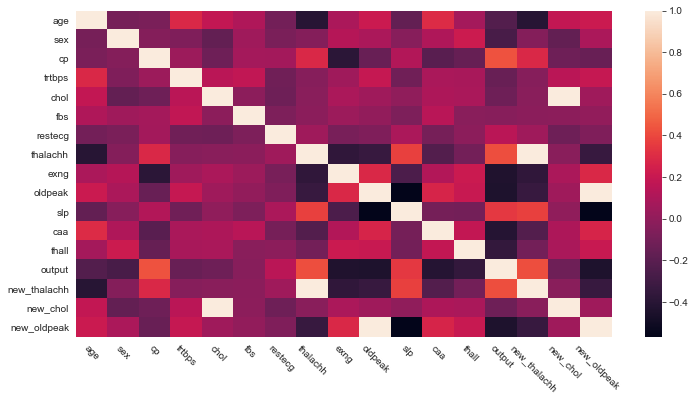

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(df_heart.corr());
plt.xticks(rotation=-45);

In [33]:
X=df_heart.iloc[:,0:13]
y=df_heart.iloc[:,13]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
# Preprocessing Lib
from sklearn.preprocessing import StandardScaler

# Metric lib
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import SCORERS

# GridSearch
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

In [38]:
import math
math.sqrt(len(y_test))

7.681145747868608

In [96]:
scores=[]
for i in range(1,50):
    classifier =KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
    classifier.fit(X_train,y_train)
    scores.append(accuracy_score(y_test,classifier.predict(X_test)))
scores

[0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745762712,
 0.8305084745

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred =classifier.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
f1_score(y_test,y_pred)

In [70]:
grid_result = []

In [97]:
param_grid = {'n_neighbors': [5, 10, 15, 20]}
estimator  = KNeighborsClassifier()

grid_reg = GridSearchCV(estimator, param_grid=param_grid, cv=2, verbose=10, n_jobs=13, scoring="accuracy")
grid_reg.fit(X_train, y_train)
print("Best Score:", grid_reg.best_score_)
print("Best Params:", grid_reg.best_params_)

grid_result.append(grid_reg)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.


Best Score: 0.8170360712733594
Best Params: {'n_neighbors': 15}


[Parallel(n_jobs=13)]: Done   3 out of  10 | elapsed:    2.5s remaining:    5.9s
[Parallel(n_jobs=13)]: Done   5 out of  10 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=13)]: Done   7 out of  10 | elapsed:    2.5s remaining:    1.0s
[Parallel(n_jobs=13)]: Done  10 out of  10 | elapsed:    2.5s finished


In [72]:
param_grid = {}
estimator  = LogisticRegression()

grid_reg = GridSearchCV(estimator, param_grid=param_grid, cv=2, verbose=10, n_jobs=13, scoring="accuracy")
grid_reg.fit(X_train, y_train)
print("Best Score:", grid_reg.best_score_)
print("Best Params:", grid_reg.best_params_)

grid_result.append(grid_reg)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Score: 0.8042155584528465
Best Params: {}


[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Batch computation too fast (0.0070s.) Setting batch_size=2.
[Parallel(n_jobs=13)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done   2 out of   2 | elapsed:    0.0s finished


In [73]:
param_grid = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
estimator  = DecisionTreeClassifier()

grid_reg = GridSearchCV(estimator, param_grid=param_grid, cv=2, verbose=10, n_jobs=13, scoring="accuracy")
grid_reg.fit(X_train, y_train)
print("Best Score:", grid_reg.best_score_)
print("Best Params:", grid_reg.best_params_)

grid_result.append(grid_reg)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best Score: 0.7573518759959439
Best Params: {'max_depth': 4}


[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Batch computation too fast (0.0320s.) Setting batch_size=2.
[Parallel(n_jobs=13)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=13)]: Done  15 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  19 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  23 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  27 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  31 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  36 out of  36 | elapsed:    0.0s finished


In [74]:
param_grid = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
estimator  = SVC()

grid_reg = GridSearchCV(estimator, param_grid=param_grid, cv=2, verbose=10, n_jobs=13, scoring="accuracy")
grid_reg.fit(X_train, y_train)
print("Best Score:", grid_reg.best_score_)
print("Best Params:", grid_reg.best_params_)

grid_result.append(grid_reg)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=13)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=13)]: Done  11 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  15 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  19 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  23 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  27 out of  32 | elapsed:    0.0s remaining:    0.0s


Best Score: 0.8213095755468638
Best Params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


[Parallel(n_jobs=13)]: Done  32 out of  32 | elapsed:    0.4s finished


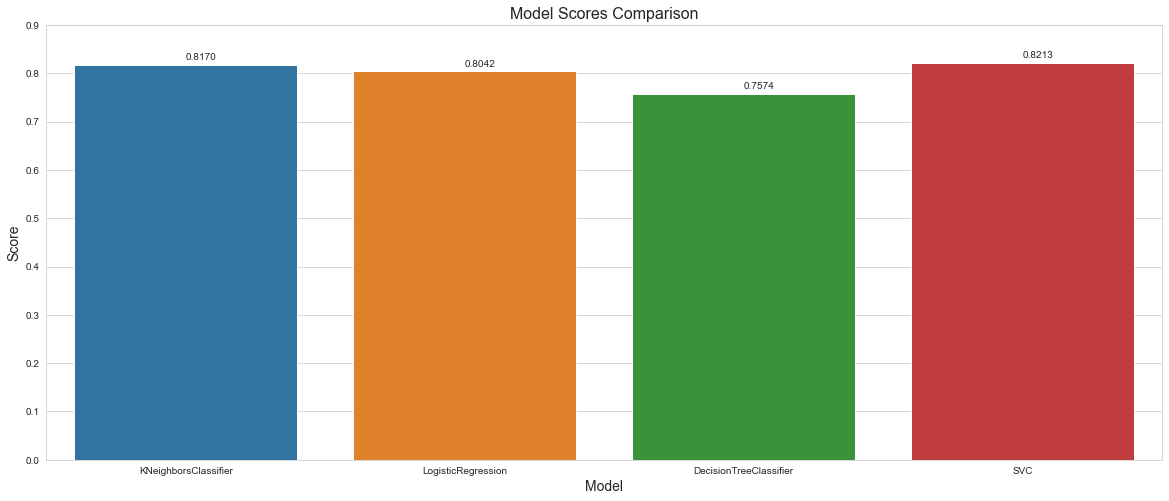

In [75]:
best_scores = [x.best_score_ for x in grid_result]
model_names = [x.best_estimator_.__class__.__name__ for x in grid_result]
fig, ax =plt.subplots(1,figsize=(20, 8))
g=sns.barplot(model_names, best_scores)
plt.title("Model Scores Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.yticks(np.arange(0.0, 1.0, 0.1))

for i in range(len(model_names)):
    g.text(i, best_scores[i]+0.01, "{:0.4f}".format(best_scores[i]))

plt.show()

In [82]:
model  = SVC(C = 1000, kernel = 'rbf', gamma = 0.0001)
model.fit(X_train, y_train)

SVC(C=1000, gamma=0.0001)

In [85]:
prediction = model.predict(X_test)
accuracy_score(y_test, prediction)

0.8135593220338984

In [87]:
pred_df = pd.DataFrame()
pred_df["actual"] = y_test
pred_df["predicted"] = prediction
x = [x for x in range(1, len(y_test)+1)]
pred_df["index"] = x
pred_df.head(10)

,actual,predicted,index
223,0,0,1
217,0,0,2
46,1,1,3
237,0,0,4
22,1,1,5
246,0,0,6
188,0,1,7
203,0,0,8
60,1,1,9
74,1,1,10


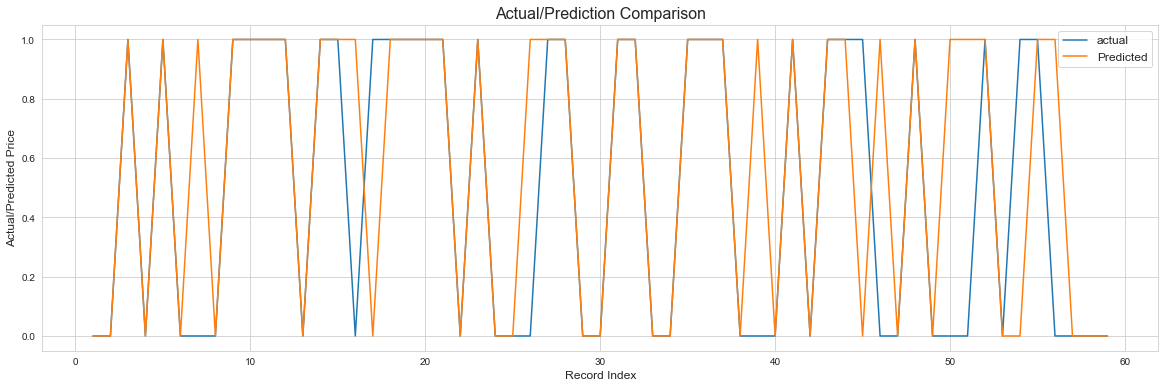

In [89]:
plt.figure(figsize=(20,6))
sns.lineplot(data=pred_df, x="index", y="actual")
sns.lineplot(data=pred_df, x="index", y="predicted")
plt.title("Actual/Prediction Comparison", fontsize=16)
plt.legend(["actual", "Predicted"], fontsize=12)
plt.ylabel("Actual/Predicted Price", fontsize=12)
plt.xlabel("Record Index", fontsize=12)
plt.show()

In [91]:
print(confusion_matrix(y_test, prediction))

[[22  8]
 [ 3 26]]


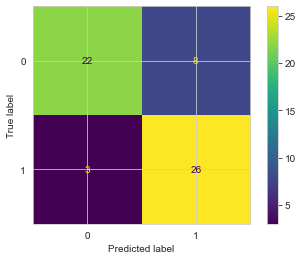

In [95]:
plot_confusion_matrix(model, X_test, y_test)